# This is a Linear Regression Model for predicting the Housing price

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

plt.style.use('deeplearning.mplstyle')

In [2]:
#Loading the data set
data = np.loadtxt('./data/data_house.csv', delimiter=',', skiprows=1)

Y = data[:, 0]
X = data[:, 1:]


print(f'The shape of the input is {X.shape}')
print(f'The shape of the output is {Y.shape}')

The shape of the input is (21613, 14)
The shape of the output is (21613,)


In [3]:
# Printing the first five rows of data
print(f' The first five input\n {X[:5]}')
print(f'The first five output\n {Y[:5]}')

 The first five input
 [[3.000e+00 1.000e+00 1.180e+03 5.650e+03 1.000e+00 0.000e+00 0.000e+00
  3.000e+00 7.000e+00 1.180e+03 0.000e+00 1.955e+03 1.340e+03 5.650e+03]
 [3.000e+00 2.250e+00 2.570e+03 7.242e+03 2.000e+00 0.000e+00 0.000e+00
  3.000e+00 7.000e+00 2.170e+03 4.000e+02 1.951e+03 1.690e+03 7.639e+03]
 [2.000e+00 1.000e+00 7.700e+02 1.000e+04 1.000e+00 0.000e+00 0.000e+00
  3.000e+00 6.000e+00 7.700e+02 0.000e+00 1.933e+03 2.720e+03 8.062e+03]
 [4.000e+00 3.000e+00 1.960e+03 5.000e+03 1.000e+00 0.000e+00 0.000e+00
  5.000e+00 7.000e+00 1.050e+03 9.100e+02 1.965e+03 1.360e+03 5.000e+03]
 [3.000e+00 2.000e+00 1.680e+03 8.080e+03 1.000e+00 0.000e+00 0.000e+00
  3.000e+00 8.000e+00 1.680e+03 0.000e+00 1.987e+03 1.800e+03 7.503e+03]]
The first five output
 [221900. 538000. 180000. 604000. 510000.]


In [4]:
# Splitting the data into training, cross validation and testing

x_train, x_, y_train, y_ = train_test_split(X, Y, test_size= 0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size= 0.50, random_state=1)

del x_, y_ 

print(f'The shape of the training input is {x_train.shape}')
print(f'The shape of the training output is {y_train.shape}')
print(f'The shape of the cross validation input is {x_cv.shape}')
print(f'The shape of the cross validation output is {y_cv.shape}')
print(f'The shape of the testing input is {x_test.shape}')
print(f'The shape of the testing output is {y_test.shape}')

The shape of the training input is (12967, 14)
The shape of the training output is (12967,)
The shape of the cross validation input is (4323, 14)
The shape of the cross validation output is (4323,)
The shape of the testing input is (4323, 14)
The shape of the testing output is (4323,)


In [5]:
# Running feature scaling on the training input

scaler_linear = StandardScaler()

x_train_scaled = scaler_linear.fit_transform(x_train)

print(f'Computed mean of the scaled training set{scaler_linear.mean_.squeeze()}')
print(f'Computed standard deviation of the scaled training set{scaler_linear.scale_.squeeze()}')

Computed mean of the scaled training set[3.36562042e+00 2.11151384e+00 2.07418262e+03 1.53417450e+04
 1.49706948e+00 7.63476517e-03 2.30585332e-01 3.40811290e+00
 7.65443048e+00 1.78231326e+03 2.91869361e+02 1.97096722e+03
 1.98099784e+03 1.28027797e+04]
Computed standard deviation of the scaled training set[9.42946915e-01 7.61603435e-01 9.01038756e+02 4.49444524e+04
 5.42046302e-01 8.70429522e-02 7.58619265e-01 6.49864080e-01
 1.16722758e+00 8.15925969e+02 4.39800457e+02 2.95305798e+01
 6.76571762e+02 2.82824115e+04]


In [6]:
print(x_train_scaled[:5])

[[-0.38774232  0.51008982  0.41709347 -0.21319083  0.92783682 -0.08771262
  -0.30395396 -0.62799732  1.15279107  0.8183178  -0.66364042  0.98314275
   0.69320386 -0.24894552]
 [-0.38774232  0.51008982  1.63790666  2.69224005  0.92783682 -0.08771262
  -0.30395396 -0.62799732  2.00952202  2.16647933 -0.66364042  0.2042891
   1.62436895  7.15579788]
 [-0.38774232  0.51008982 -0.6594418  -0.1548744  -0.91702403 -0.08771262
  -0.30395396  0.91078599 -0.56067085 -0.37051555 -0.66364042 -0.10047972
  -0.4005456  -0.16804719]
 [ 0.67276277  0.181835    0.02865291 -0.05793251  0.92783682 -0.08771262
  -0.30395396  0.91078599  0.29606011  0.38935731 -0.66364042  0.13656269
   0.02808595 -0.02520222]
 [ 0.67276277 -0.47467465 -0.61504859 -0.17002644 -0.91702403 -0.08771262
  -0.30395396  0.91078599 -0.56067085 -0.32149149 -0.66364042 -0.13434293
  -0.68137316 -0.1874939 ]]


Training the model without polynomial features

In [7]:
# Training the model without the scaled input 
linear_model_unscaled = LinearRegression()

linear_model_unscaled.fit(x_train, y_train)

# getting prediction and calculating the mean squared error 
y_hat = linear_model_unscaled.predict(x_train)
error = mean_squared_error(y_train, y_hat)
print(f'The mean squared error of the model without scaling: {error/ 2}')

# Training the model with the scaled input 
linear_model = LinearRegression()

linear_model.fit(x_train_scaled, y_train)
y_hat = linear_model.predict(x_train_scaled)
error = mean_squared_error(y_train, y_hat)
print(f'The mean squared error of the model with scaling: {error/ 2}')

The mean squared error of the model without scaling: 22069251042.295265
The mean squared error of the model with scaling: 22069251042.295258


Notice the difference between the scaled and unscaled version is very minimal 
This is because the polynomial features haven't been added yet 

In [8]:
# Scaling the cross validation input with the mean and deviation of the training input

x_cv_scaled = scaler_linear.transform(x_cv)

print(f'Mean used to scale the cross validation input {scaler_linear.mean_.squeeze()}')
print(f'Standard deviation used to scale the cross validation input {scaler_linear.scale_.squeeze()}')

y_hat = linear_model.predict(x_cv_scaled)

error = mean_squared_error(y_cv, y_hat)
print(f'The mean squared error of the model: {error / 2}')

Mean used to scale the cross validation input [3.36562042e+00 2.11151384e+00 2.07418262e+03 1.53417450e+04
 1.49706948e+00 7.63476517e-03 2.30585332e-01 3.40811290e+00
 7.65443048e+00 1.78231326e+03 2.91869361e+02 1.97096722e+03
 1.98099784e+03 1.28027797e+04]
Standard deviation used to scale the cross validation input [9.42946915e-01 7.61603435e-01 9.01038756e+02 4.49444524e+04
 5.42046302e-01 8.70429522e-02 7.58619265e-01 6.49864080e-01
 1.16722758e+00 8.15925969e+02 4.39800457e+02 2.95305798e+01
 6.76571762e+02 2.82824115e+04]
The mean squared error of the model: 25225048284.30653


 Adding polynomial features to the input for a better cost function and running model evaluation to get the best degree to use for the model

In [9]:
train_mse = []
cv_mse = []
models = []
polys = []
scalers = []

for degree in range(1, 4):
    # Adding polynomial features to the input
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scaling the training input 
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    scalers.append(scaler)
    
    # Training the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    models.append(model)
    
    # Calculating the MSE for the training set
    y_hat = model.predict(x_train_mapped_scaled)
    mse = mean_squared_error(y_train, y_hat)
    mse_ = mse / 2
    train_mse.append(mse_)
    
    # Scaling the cross validation input
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    
    # Calculating the MSE for the cross validation set
    y_hat_c = model.predict(x_cv_mapped_scaled)
    mse = mean_squared_error(y_cv, y_hat_c)
    mse_ = mse / 2
    cv_mse.append(mse_)

In [10]:
print(train_mse)
print(cv_mse)

[22069251042.295258, 16674659544.761543, 13274721671.057415]
[25225048284.30653, 18578706226.238876, 29814133511.052895]


In [11]:
degree = np.argmin(cv_mse) + 1
print(f'The best degree to use for the model is {degree}')

The best degree to use for the model is 2


Computing the test error for the model

In [12]:
x_test_mapped = polys[degree - 1].transform(x_test)
x_test_mapped_scaled = scalers[degree - 1].transform(x_test_mapped)

y_hat = models[degree - 1].predict(x_test_mapped_scaled)
error = mean_squared_error(y_test, y_hat)
print(f'The mean squared error of the model on the test set is {error / 2}')

The mean squared error of the model on the test set is 17481238362.234074


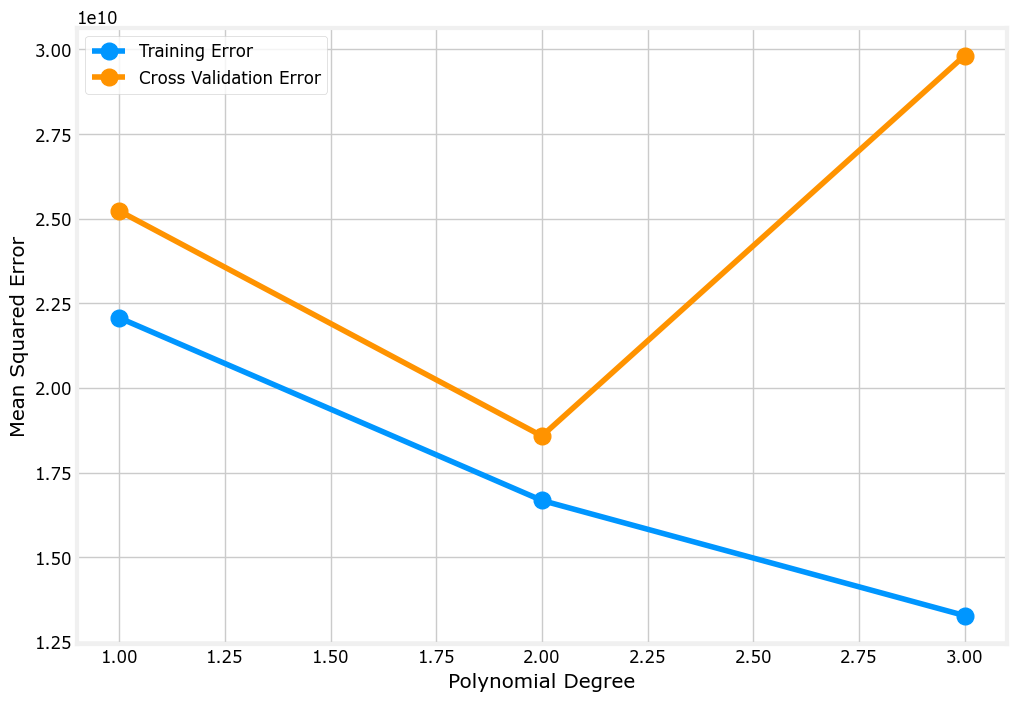

In [13]:
# Plotting the learning curve
degree = range(1, 4)
plt.plot(degree, train_mse, label='Training Error', marker='o')
plt.plot(degree, cv_mse, label='Cross Validation Error', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')

plt.legend()
plt.grid(True)
plt.show()


# Using Neural Network to predict the housing price 

Neural Network can learn to fit non-linear functions so adding a polynomial feature isn't necessary 

In [14]:
# Scaling The data 
nn_scaler = StandardScaler()
x_nn_train_scaled = nn_scaler.fit_transform(x_train)
x_nn_cv_scaled = nn_scaler.transform(x_cv)
x_nn_test_scaled = nn_scaler.transform(x_test)


In [15]:
# Building the Models
def train_model():
    tf
    model_1 = Sequential(
        [
        Dense(25, activation='relu'),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1, activation='relu')
        ],
        name='model_1'
    )
    
    model_2 = Sequential(
        [
        Dense(40, activation='relu'),
        Dense(57, activation='relu'),
        Dense(70, activation='relu'),
        Dense(80, activation='relu'),
        Dense(30, activation='relu'),
        Dense(1, activation='relu')
        ],
        name='model_2'
    )
    
    model_3 = Sequential(
        [
        Dense(100, activation='relu'),
        Dense(120, activation='relu'),
        Dense(150, activation='relu'),
        Dense(100, activation='relu'),
        Dense(120, activation='relu'),
        Dense(90, activation='relu'),
        Dense(50, activation='relu'),
        Dense(30, activation='relu'),
        Dense(1, activation='relu')
        ], name='model_3'
    )
    
    nn_models = [model_1, model_2, model_3]
    return nn_models

In [1]:
# Training the models
train_mse = []
test_mse = []


nn_models = train_model()
for model in nn_models:
    # Setting up the loss and optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.MeanSquaredError())
    
    print(f'Training Model: {model.name}...')
    
    # Training the model
    model.fit(x_nn_train_scaled, y_train, epochs=300, verbose=1)
    
    print(f'Done Training {model.name}')
    
    # Calculating the mean squared error for the training set
    
    y_hat = model.predict(x_nn_train_scaled)
    error = mean_squared_error(y_train, y_hat) / 2
    test_mse.append(error)
    
    # Calculating the mean squared error for the cross validation set
    
    y_cv_hat = model.predict(x_nn_cv_scaled)
    error = mean_squared_error(y_cv, y_cv_hat) / 2
    train_mse.append(error)
    
    
print('Done...')
print('Results:')

for i in range(len(train_mse)):
    print(f'{nn_models[i].name} Train MSE: {train_mse[i]}')
    print(f'{nn_models[i].name} CV MSE: {test_mse[i]}')

NameError: name 'train_model' is not defined

Notice the low cv which indicates that the model is generalizing well to new data

In [ ]:
# Selecting the best model to use for the test set
model_num = 2

# testing the best model on the test data
y_hat = nn_models[model_num - 1].predict(x_nn_test_scaled)
error = mean_squared_error(y_test, y_hat) / 2
print(f'mse: {error}')
